In [ ]:
#Map all of the nuclear power plants in red, with the rest of the plants as dark grey

In [1]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point

%matplotlib inline

In [2]:
df = pd.read_csv("powerplants.csv")
df.head()

,Plant_Code,Plant_Name,Utility_Na,Utility_ID,sector_nam,City,County,Zip,Street_Add,PrimSource,...,Solar_MW,Wind_MW,Geo_MW,Other_MW,source_des,tech_desc,Source,Period,Latitude,Longitude
0,2,Bankhead Dam,Alabama Power Co,195,Electric Utility,Northport,Tuscaloosa,35476,19001 Lock 17 Road,hydroelectric,...,0.0,0.0,NaN,NaN,Hydroelectric = 56 MW,Conventional Hydroelectric,"EIA-860, EIA-860M and EIA-923",201607,33.458665,-87.356823
1,3,Barry,Alabama Power Co,195,Electric Utility,Bucks,Mobile,36512,North Highway 43,coal,...,0.0,0.0,NaN,NaN,"Coal = 1088.5 MW, Natural Gas = 1072 MW",Conventional Steam Coal; Natural Gas Fired Com...,"EIA-860, EIA-860M and EIA-923",201607,31.006900,-88.010300
2,4,Walter Bouldin Dam,Alabama Power Co,195,Electric Utility,Wetumpka,Elmore,36092,750 Bouldin Dam Road,hydroelectric,...,0.0,0.0,NaN,NaN,Hydroelectric = 225.9 MW,Conventional Hydroelectric,"EIA-860, EIA-860M and EIA-923",201607,32.583889,-86.283056
3,7,Gadsden,Alabama Power Co,195,Electric Utility,Gadsden,Etowah,35903,1000 Goodyear Ave,natural gas,...,0.0,0.0,NaN,NaN,Natural Gas = 130 MW,Natural Gas Steam Turbine,"EIA-860, EIA-860M and EIA-923",201607,34.012800,-85.970800
4,8,Gorgas,Alabama Power Co,195,Electric Utility,Parrish,Walker,35580,460 Gorgas Road,coal,...,0.0,0.0,NaN,NaN,Coal = 1034 MW,Conventional Steam Coal,"EIA-860, EIA-860M and EIA-923",201607,33.644344,-87.196486


In [3]:
nuclear = df[df['PrimSource'] == 'nuclear']

In [4]:
states = gpd.read_file("cb_2016_us_state_500k/cb_2016_us_state_500k.shp")
states.head()

,AFFGEOID,ALAND,AWATER,GEOID,LSAD,NAME,STATEFP,STATENS,STUSPS,geometry
0,0400000US01,131173688951,4593686489,01,00,Alabama,01,01779775,AL,"(POLYGON ((-88.053375 30.506987, -88.051087999..."
1,0400000US02,1477946266785,245390495931,02,00,Alaska,02,01785533,AK,"(POLYGON ((-134.737262 58.261354, -134.73441 5..."
2,0400000US04,294198560125,1027346486,04,00,Arizona,04,01779777,AZ,"POLYGON ((-114.816294 32.508038, -114.814321 3..."
3,0400000US05,134771517596,2960191698,05,00,Arkansas,05,00068085,AR,"POLYGON ((-94.6178329666013 36.4994141203285, ..."
4,0400000US06,403501101370,20466718403,06,00,California,06,01779778,CA,"(POLYGON ((-118.604415 33.478552, -118.598783 ..."


In [5]:
continental = states[states['NAME'] != 'Alaska']

In [6]:
continental = continental[continental['NAME'] != 'Hawaii']

In [7]:
continental = continental[continental['NAME'] != 'Puerto Rico']

In [8]:
continental = continental[continental['NAME'] != 'American Samoa']

In [9]:
continental = continental[continental['NAME'] != 'Guam']

In [10]:
continental = continental[continental['NAME'] != 'Commonwealth of the Northern Mariana Islands']

In [11]:
continental = continental[continental['NAME'] != 'United States Virgin Islands']

In [12]:
points_nuc = nuclear.apply(lambda row: Point(row.Longitude, row.Latitude), axis=1)
points_nuc

22                  POINT (-87.1189 34.7042)
106                 POINT (-88.8339 40.1719)
108      POINT (-95.68978 38.23925999999999)
220                POINT (-119.3339 46.4711)
361                 POINT (-72.1677 41.3107)
384                 POINT (-80.3308 25.4356)
398                 POINT (-81.7625 33.1427)
502                     POINT (-88.27 41.39)
506             POINT (-90.310278 41.726111)
577       POINT (-91.77809999999999 42.1011)
806                  POINT (-70.578 41.9438)
845                  POINT (-86.3146 42.323)
851                 POINT (-83.2581 41.9631)
935                 POINT (-93.8493 45.3338)
936        POINT (-92.63330000000001 44.622)
1105            POINT (-96.077511 41.520522)
1147                POINT (-74.2062 39.8143)
1157      POINT (-75.53579999999999 39.4625)
1179    POINT (-73.95269999999999 41.270556)
1237                  POINT (-76.41 43.5211)
1463            POINT (-76.268742 39.758936)
1471                POINT (-80.1589 34.4017)
1482      

In [13]:
not_nuclear = df[df['PrimSource'] != 'nuclear']

In [14]:
not_nuclear['PrimSource'].value_counts()

natural gas       1676
hydroelectric     1398
solar             1379
wind               932
petroleum          832
biomass            739
coal               380
other              112
geothermal          66
pumped storage      34
Name: PrimSource, dtype: int64

In [15]:
points_not_nuc = not_nuclear.apply(lambda row: Point(row.Longitude, row.Latitude), axis=1)
points_not_nuc

0               POINT (-87.35682299999999 33.458665)
1                           POINT (-88.0103 31.0069)
2                       POINT (-86.283056 32.583889)
3                           POINT (-85.9708 34.0128)
4               POINT (-87.19648599999999 33.644344)
5                           POINT (-106.375 31.7569)
6                           POINT (-87.7811 32.6017)
7                 POINT (-86.05240000000001 33.7845)
8                           POINT (-87.4495 33.2553)
9                           POINT (-86.2548 32.6189)
10                      POINT (-86.337547 33.425878)
11                          POINT (-86.5187 32.9633)
12              POINT (-85.91144200000001 32.680394)
13              POINT (-86.44489200000001 32.806025)
14                POINT (-87.10769999999999 33.9406)
15                      POINT (-85.887614 32.535436)
16              POINT (-85.75380600000001 34.172142)
17                          POINT (-85.8901 32.5743)
18                      POINT (-86.458056 33.2

In [16]:
nuc_plants = gpd.GeoDataFrame(nuclear, geometry=points_nuc)
nuc_plants.crs = {'init' : 'epsg:4326'}

In [17]:
not_nuc_plants = gpd.GeoDataFrame(not_nuclear, geometry=points_not_nuc)
not_nuc_plants.crs = {'init' : 'epsg:4326'}

(-180.29806094999998, 8.5856219500000002, -3.5646000000000004, 74.8566)

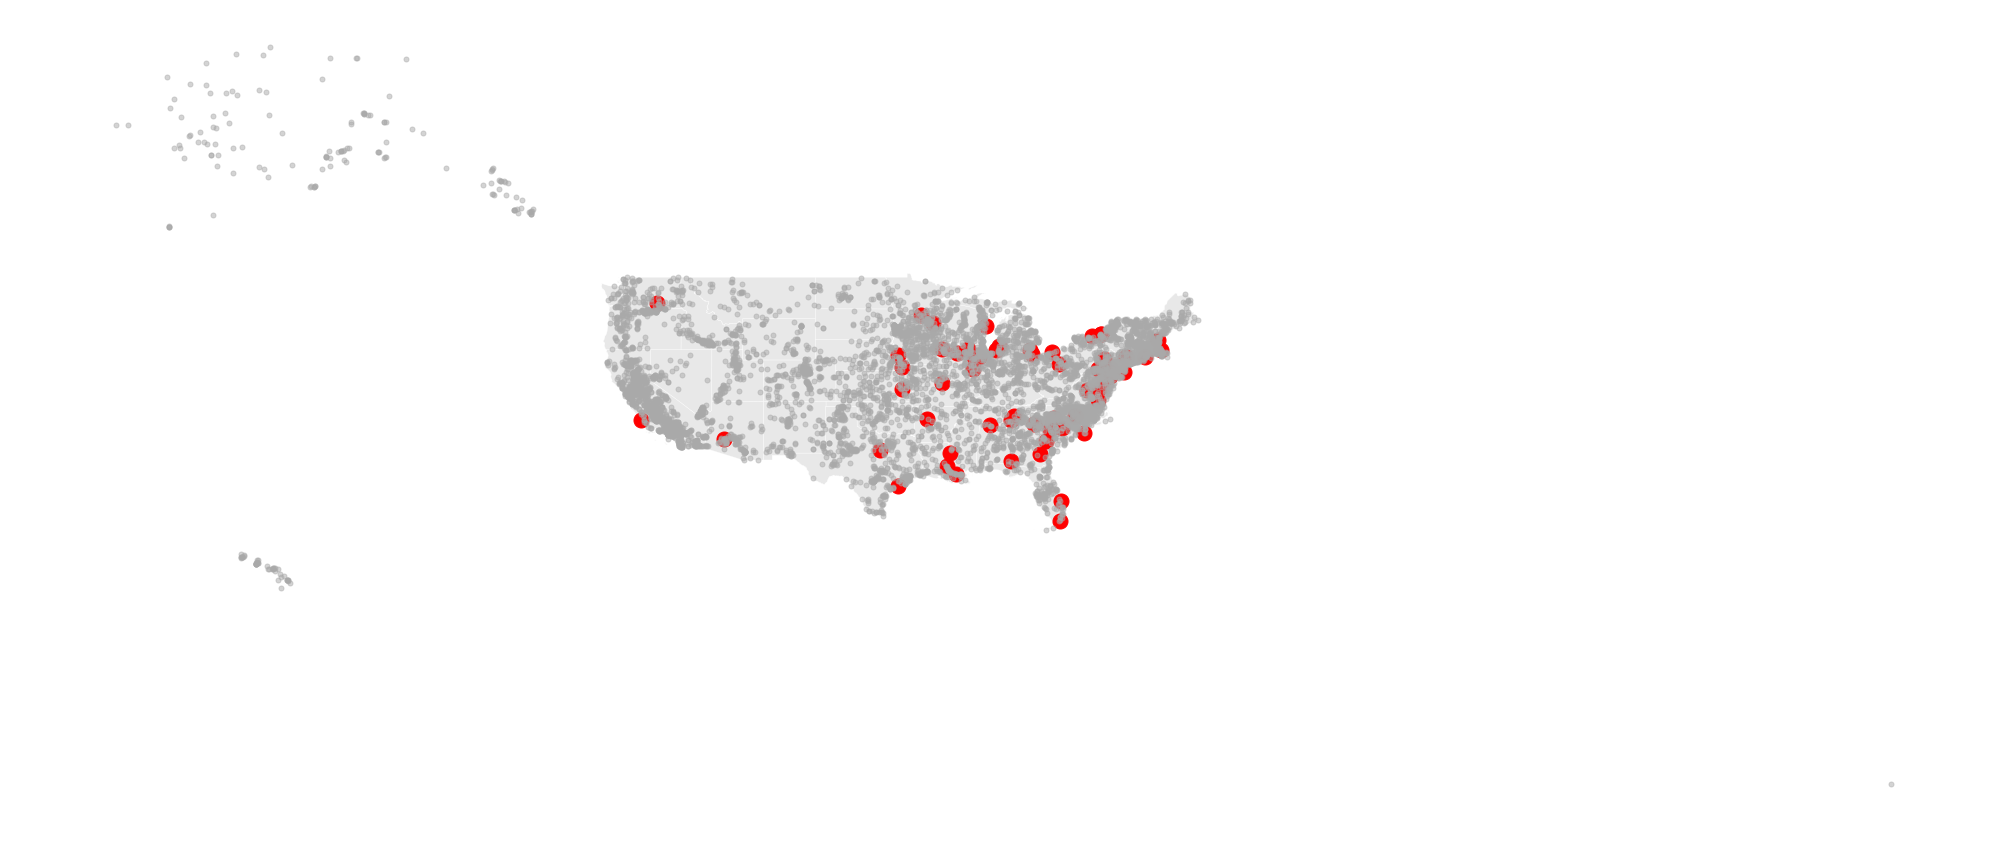

In [18]:
ax = continental.plot(figsize=(35,20), linewidth=0.25, edgecolor='white', color='lightgrey') 
nuc_plants.plot(linewidth=0, markersize=15, alpha=1, color='red', ax=ax)
not_nuc_plants.plot(linewidth=0, markersize=5, alpha=0.5, color='darkgrey', ax=ax)
ax.axis('off')